In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/GP_HistoricalPrices - GP_HistoricalPrices.csv')

In [5]:
df

,Date,Open,High,Low,Close,Volume
0,2009-12-01,182.0,182.9,177.0,177.3,1112600
1,2009-12-02,177.1,177.5,174.2,174.7,921600
2,2009-12-03,174.4,175.4,172.4,173.6,773200
3,2009-12-07,172.0,173.8,170.0,170.1,752800
4,2009-12-08,170.0,171.2,168.6,169.4,555000
...,...,...,...,...,...,...
2366,2022-08-03,301.2,301.2,297.0,297.7,264637
2367,2022-08-04,299.1,301.5,296.2,299.7,138837
2368,2022-08-08,302.9,305.2,300.1,302.7,180712
2369,2022-08-11,292.0,292.0,286.6,287.3,441341


In [6]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,2009-12-01,177.3
1,2009-12-02,174.7
2,2009-12-03,173.6
3,2009-12-07,170.1
4,2009-12-08,169.4
5,2009-12-09,170.7
6,2009-12-10,169.2
7,2009-12-14,176.0
8,2009-12-15,172.8
9,2009-12-17,171.1


In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2009-12-17')
datetime_object

datetime.datetime(2009, 12, 17, 0, 0)

In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['Date']

0      2009-12-01
1      2009-12-02
2      2009-12-03
3      2009-12-07
4      2009-12-08
          ...    
2366   2022-08-03
2367   2022-08-04
2368   2022-08-08
2369   2022-08-11
2370   2022-08-16
Name: Date, Length: 2371, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')

In [11]:
df.index

DatetimeIndex(['2009-12-01', '2009-12-02', '2009-12-03', '2009-12-07',
               '2009-12-08', '2009-12-09', '2009-12-10', '2009-12-14',
               '2009-12-15', '2009-12-17',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-08',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2371, freq=None)

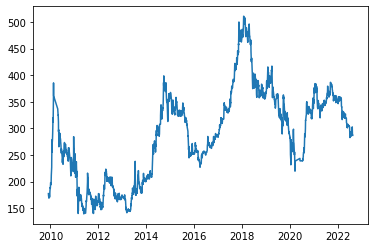

In [12]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [13]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [14]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2009-12-17', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2009-12-17,170.1,169.4,170.7,169.2,176.0,172.8,171.1
1,2009-12-21,169.4,170.7,169.2,176.0,172.8,171.1,170.8
2,2009-12-22,170.7,169.2,176.0,172.8,171.1,170.8,176.7
3,2009-12-23,169.2,176.0,172.8,171.1,170.8,176.7,180.2
4,2009-12-24,176.0,172.8,171.1,170.8,176.7,180.2,182.5
...,...,...,...,...,...,...,...,...
2356,2022-08-02,287.1,287.1,286.3,286.3,285.7,297.8,298.6
2357,2022-08-03,287.1,286.3,286.3,285.7,297.8,298.6,297.7
2358,2022-08-04,286.3,286.3,285.7,297.8,298.6,297.7,299.7
2359,2022-08-08,286.3,285.7,297.8,298.6,297.7,299.7,302.7


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2361,), (2361, 6, 1), (2361,))

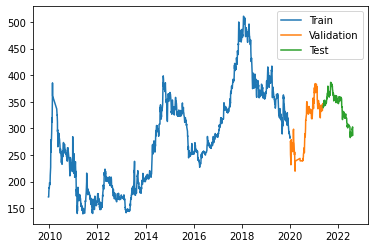

In [16]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [19]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
59/59 [==============================] - 0s 5ms/step - loss: 50.1224 - mean_absolute_error: 5.0542 - val_loss: 45.7026 - val_mean_absolute_error: 5.1333
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 46.0022 - mean_absolute_error: 4.8201 - val_loss: 109.6320 - val_mean_absolute_error: 8.8700
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 48.5094 - mean_absolute_error: 4.9864 - val_loss: 51.2971 - val_mean_absolute_error: 5.1909
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 49.8364 - mean_absolute_error: 5.2110 - val_loss: 38.0721 - val_mean_absolute_error: 4.0781
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 40.2016 - mean_absolute_error: 4.4886 - val_loss: 44.6341 - val_mean_absolute_error: 4.5406
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 42.3968 - mean_absolute_error: 4.5582 - val_loss: 51.8862 - val_mean_absolute_error: 5.2917
Epoch 7/1

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

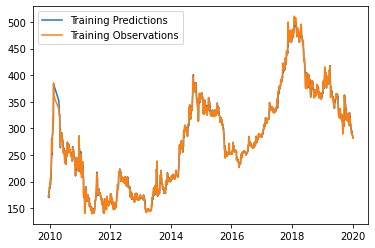

In [21]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [22]:
results = model.evaluate(X_train, y_train)

59/59 [==============================] - 0s 2ms/step - loss: 34.3238 - mean_absolute_error: 3.8887


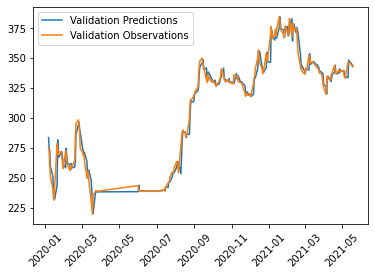

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

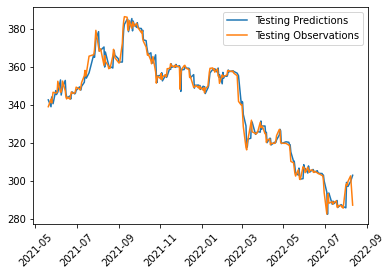

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [25]:
results = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 13.3004 - mean_absolute_error: 2.4858


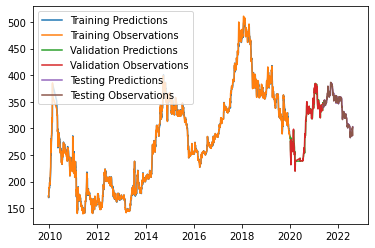

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])